In [59]:
import pandas as pd
import numpy as np

In [60]:
# Opening the csv file into a dataframe,
df = pd.read_csv('../Data/measurements.csv')

In [61]:
# Now we can get some info about the dataframe, see what we are dealing with,
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [62]:
# let's, now, check the columns with nulls in them,
# df.specials.unique()
#df['refill liters'].unique()
df['refill gas'].unique()

array(['E10', nan, 'SP98'], dtype=object)

### Coments on the dataframe:
First, the dataframe is preaty clean, there aren't nulls in most columns. 

The first decision I am taking is to drop most columns with nulls in them. I consider it justified as the information in specials can be gathered using the other columns, so it doesn't add any information to the study. The only special that I haven't seen in other columns is snow, so we might want to add a new column in order to not lose this information. And the other 2 columns with nulls are refill liters and refill gas, if they were important to the study they are just present in 13 rows which is an irrelevant subset. 

Lastly we also find nulls in temp_outside. In this case I am going to keep the column as the difference between the temperature inside an outside might be relevant. 



In [63]:
df['snow'] = df.specials.apply(lambda x: True if type(x) != float and 'snow' in x else False)

In [64]:
# Let's do some dropping,
cols_2drop = ['specials', 'refill liters','refill gas']
df.drop(columns=cols_2drop, inplace=True)

In [65]:
# Let's now dig a little bit into the data and the numbers and stadistics,
df.describe()

,speed,temp_outside,AC,rain,sun
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,41.927835,11.358247,0.077320,0.123711,0.082474
std,13.598524,6.991542,0.267443,0.329677,0.275441
min,14.000000,-5.000000,0.000000,0.000000,0.000000
25%,32.750000,7.000000,0.000000,0.000000,0.000000
50%,40.500000,10.000000,0.000000,0.000000,0.000000
75%,50.000000,16.000000,0.000000,0.000000,0.000000
max,90.000000,31.000000,1.000000,1.000000,1.000000


In [66]:
# Here we see that we are missing a column, that is probably due to the format in which pandas is getting the info from that column,
# let's turn it into float numbers,
df.temp_inside = df.temp_inside.apply(lambda x: float(x.replace(',','.')) if type(x) != float else x)
# The same thing happens with some other columns, such as consume or distance,
df.consume = df.consume.apply(lambda x: float(x.replace(',','.')))
df.distance = df.distance.apply(lambda x: float(x.replace(',','.')))
# It is also obvious that sun, rain and AC should be booleans (0 or 1),
df.rain = df.rain.apply(lambda x: bool(x))
df.sun = df.sun.apply(lambda x: bool(x))
df.AC = df.AC.apply(lambda x: bool(x))

In [67]:
# let's check if we solved the problem,
df.describe()

,distance,consume,speed,temp_inside,temp_outside
count,388.000000,388.000000,388.000000,376.000000,388.000000
mean,19.652835,4.912371,41.927835,21.929521,11.358247
std,22.667837,1.033172,13.598524,1.010455,6.991542
min,1.300000,3.300000,14.000000,19.000000,-5.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000
50%,14.600000,4.700000,40.500000,22.000000,10.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000


<AxesSubplot:>

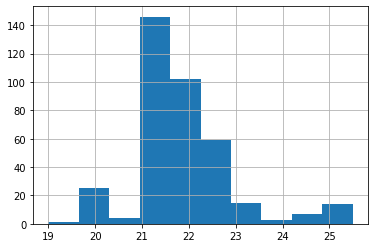

In [68]:
# Now that everything is running smoothly we have to decide what to do with the column of temperature inside and its NaN's,
df.temp_inside.hist()

In [69]:
# In the histogram I noticed that most values are around 21.5ºC so I am going to use this value to fill the NaN's,
df.temp_inside.fillna(21.5, inplace=True)

In [70]:
# Now, as I said I think that the interesting think involving temperature must be the difference
# between the temperature inside and the temperature outside the cars, so I am creating a new column with the difference,
df['temp_gradient'] = df.apply(lambda x: x.temp_outside-x.temp_inside, axis=1)

In [71]:
# let's check the correlations between the columns to see if there is any evident correlation between them,
df.corr()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,snow,temp_gradient
distance,1.000000,-0.128967,0.562299,0.077636,0.088175,-0.025738,-0.019791,0.081120,-0.033712,0.080453
consume,-0.128967,1.000000,-0.227866,-0.154953,-0.320811,0.096591,0.248118,-0.170667,0.072961,-0.311697
speed,0.562299,-0.227866,1.000000,0.060039,0.015411,-0.035408,0.009489,0.081618,0.032481,0.007143
temp_inside,0.077636,-0.154953,0.060039,1.000000,0.357431,0.300407,-0.035199,0.241530,0.098230,0.224108
temp_outside,0.088175,-0.320811,0.015411,0.357431,1.000000,0.167562,-0.186315,0.346903,-0.162367,0.990287
AC,-0.025738,0.096591,-0.035408,0.300407,0.167562,1.000000,0.242915,0.088598,0.065984,0.130129
rain,-0.019791,0.248118,0.009489,-0.035199,-0.186315,0.242915,1.000000,-0.112650,0.271633,-0.189179
sun,0.081120,-0.170667,0.081618,0.241530,0.346903,0.088598,-0.112650,1.000000,-0.030600,0.326036
snow,-0.033712,0.072961,0.032481,0.098230,-0.162367,0.065984,0.271633,-0.030600,1.000000,-0.184053
temp_gradient,0.080453,-0.311697,0.007143,0.224108,0.990287,0.130129,-0.189179,0.326036,-0.184053,1.000000


Here we can already see some tips to lead us into the study of the dataframe, now we must decide what are our objectives and what we want to show in the study in order to transform the dataframe. As Cobify is a company and companies rely on gainings I am going to focus on the price of each commute. I am also going to try and predict the price of a commute before it happens so we can be able to offer the client the best possible price and make it more likely than they trust cobify before other companies. 

In [72]:
# Let's load this dataframe into a file and transform and play with it in another file,
df.to_csv('../Data/cleaned_mes.csv')